# Job Skill Column Word Cloud

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_skill_wordcloud(df, skill_col='skill'):
    # Drop rows where skill column is NaN or empty
    skills_series = df[skill_col].dropna()

    # Split skills by "、" and flatten into one list
    all_skills = []
    for skills in skills_series:
        words = skills.split('、')
        all_skills.extend(words)

    # Count frequency of each skill word
    skill_counts = Counter(all_skills)

    # Remove space " " if present as a key
    if ' ' in skill_counts:
        del skill_counts[' ']
    # Remove empty strings if any
    if '' in skill_counts:
        del skill_counts['']

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=None,
        max_words=200
    ).generate_from_frequencies(skill_counts)

    # Plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keywords from Skill', fontsize=20)
    plt.show()

    # Prepare data for horizontal bar chart: top 20 most common words
    most_common = skill_counts.most_common(20)
    words, counts = zip(*most_common)

    # Plot horizontal bar chart
    plt.figure(figsize=(12, 8))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title('Top 20 Keyword Frequencies', fontsize=20)
    plt.gca().invert_yaxis()  # Highest frequency on top
    plt.tight_layout()
    plt.show()


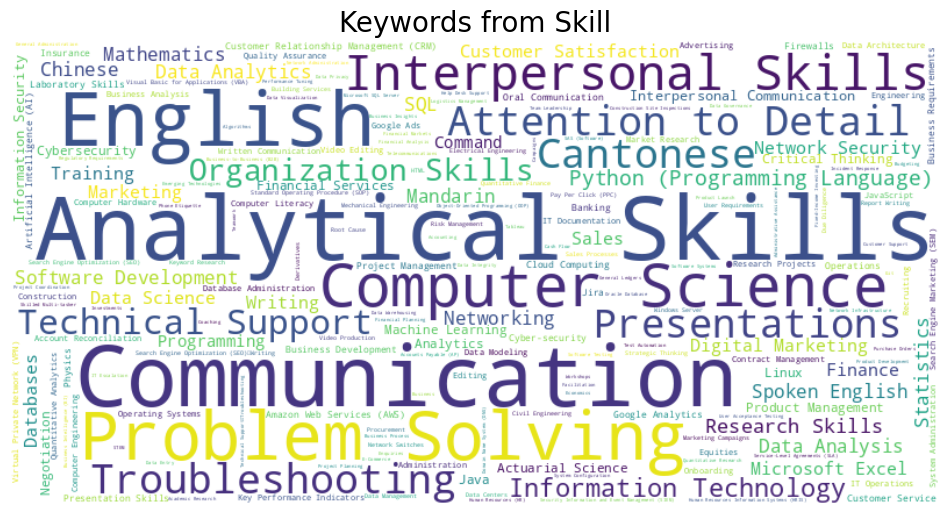

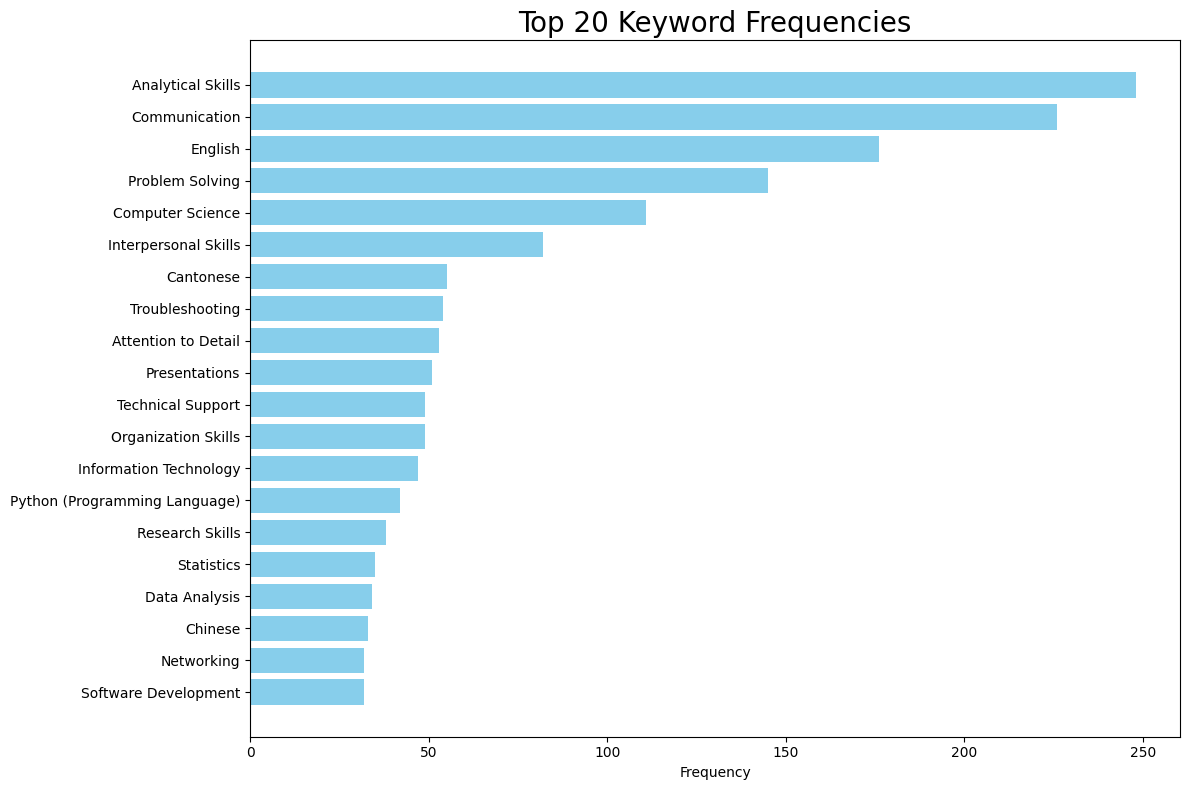

In [ ]:
if __name__ == "__main__":
    df = pd.read_csv('preprocessed_linkedin_data.csv')
    generate_skill_wordcloud(df, 'skill')

# Job Description Column Word Cloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import collections
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import bigrams, FreqDist

nltk.download('punkt_tab')

def generate_jobs_desc_wordcloud(df):
    if 'jobs-desc' not in df.columns:
        raise ValueError("The column 'jobs-desc' wasn't found in the CSV file!")

    # Merge text and convert to lowercase
    text = " ".join(df['jobs-desc'].dropna().astype(str).tolist()).lower()

    # Set stop words
    stopwords = set(STOPWORDS)
    custom_stopwords = {'job', 'description', 'work', 'will', 'role', 'within', 'including'}
    stopwords = stopwords.union(custom_stopwords)

    # Using nltk for word segmentation
    words = word_tokenize(text)

    # Processing phrases: Merge common pairs into a single word, eg. hong kong
    bigram_list = list(bigrams(words))
    bigram_freq = FreqDist(bigram_list).most_common(100)  # Take the first 100 common tuples

    # Select high-frequency, non-stopword pairs.
    valid_bigrams = []
    for bigram, freq in bigram_freq:
        w1, w2 = bigram
        if w1 not in stopwords and w2 not in stopwords and len(w1) > 2 and len(w2) > 2:
            valid_bigrams.append((w1, w2))

    # Merge high-frequency tuples
    merged_words = []
    skip_next = False
    for i in range(len(words)):
        if skip_next:
            skip_next = False
            continue

        if i < len(words) - 1:
            bigram = (words[i], words[i+1])
            if bigram in valid_bigrams:
                merged_words.append(f"{words[i]}_{words[i+1]}")  # Merge as "hong_kong"
                skip_next = True  # Skip to the next word
                continue

        # Add unmerged words separately
        merged_words.append(words[i])

    # Filter out stop words and short words
    filtered_words = [
        word for word in merged_words
        if word not in stopwords
        and len(word) > 2
        and re.match(r'^[a-z_]+$', word)  # Only words consisting of letters and underscores are retained.
    ]

    # Generate word frequency statistics
    word_freq = collections.Counter(filtered_words)

    # Generate Wordcloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords,
        collocations=False
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Keywords from Job Descriptions", fontsize=20)
    plt.show()

    # Generate bar chart
    top_keywords = word_freq.most_common(20)
    keywords, frequencies = zip(*top_keywords)

    # Display ‘hong_kong’ as ‘hong kong’
    display_keywords = [k.replace('_', ' ') for k in keywords]

    plt.figure(figsize=(12, 8))
    plt.barh(display_keywords, frequencies, color='skyblue')
    plt.xlabel("Frequency")
    plt.ylabel("Keywords")
    plt.title("Top 20 Keyword Frequencies", fontsize=16)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


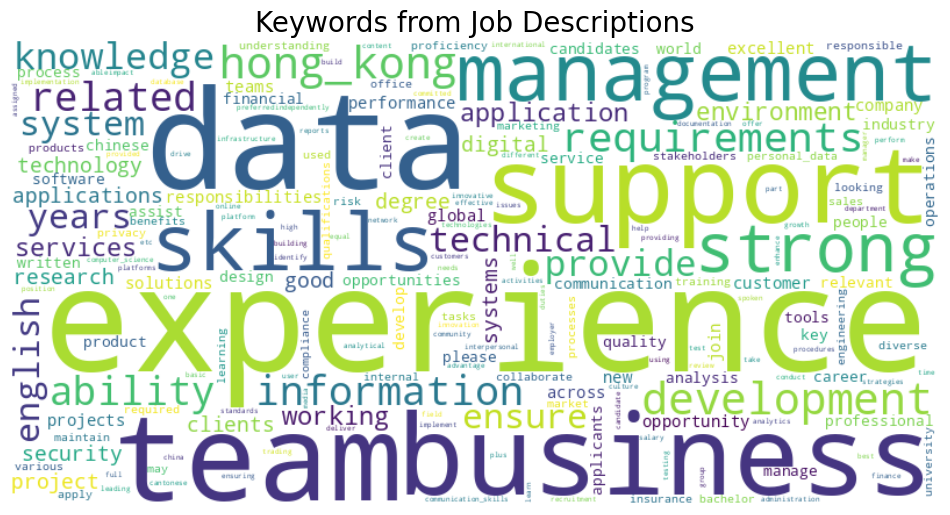

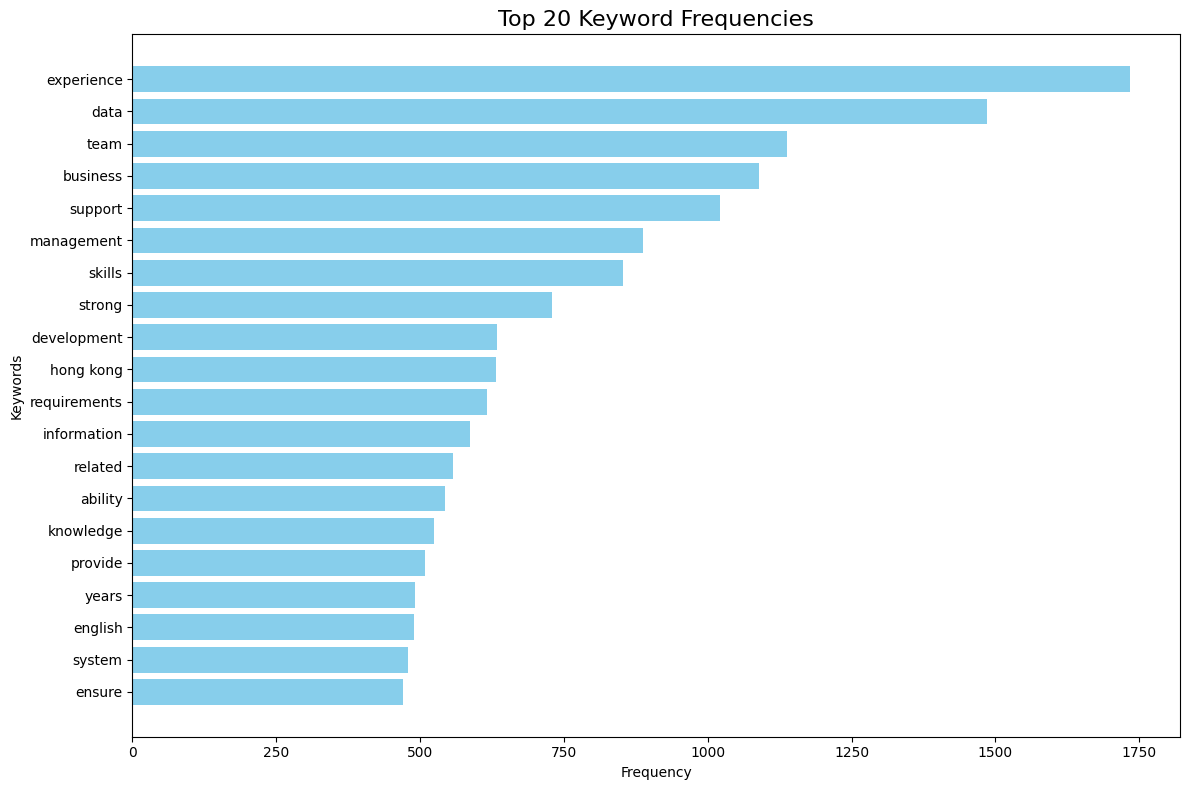

In [ ]:

if __name__ == "__main__":
    df = pd.read_csv('preprocessed_linkedin_data.csv')
    generate_jobs_desc_wordcloud(df)